<a href="https://colab.research.google.com/github/Ashif-khan033/coronavirus_tweets_sentiment_analysis/blob/main/coronavirus_tweets_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

##### **Project Type**    - Sentiment Analysis : Predicting sentiment of COVID-19 tweets (Classification)
##### **Contribution**    - Individual/Team
##### **Team Member 1 -Mohd Ashif Khan**
##### **Team Member 2 -Mayank Belwal**

# **GitHub Link -**

https://github.com/makdatascience/Coronavirus_tweets_sentiment_analysis


https://github.com/Ashif-khan033/coronavirus_tweets_sentiment_analysis

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## ***1. Know Your Data***

# <b> Problem Description </b>

### To build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Sentiment
5. UserName


# **Project Summary -**



In this Classification project, we aim to predict correct sentiment of a tweet from the data.
* We begin by extracting the target and feature variable from the data and removing other features.

*   We combine Extremely Positive/ Negative sentiments with Positive/ Sentiments to reduce the number of Classes from 5 to 3

*   In Text Pre-processing, we convert the text to lower case, remove punctuations,stop words, apply stemming and lemmatize the words

*  Then we perform an EDA on the processed dataset, where we use bar charts, pie charts and word clouds to visualise the information

* Finally we compare the models' performance using two approaches of vectorisation, Count Vectorisation( which is very basic) and TF- IDF vectorisation. Both of these vectorisation methods do not work on analysing the part of speech, but work on giving importance to a word based on the number of occurences of a word in single and also in all documents all together.

* We apply the following models:
   1.   Logistic Regression
   2.   Decision Tree
   3.   K- Nearest Neighbours
   4.   Support Vector Machines

* We also used Cross validation to improve results of our models.





### Import Libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


### Import Dataset

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Assigning variable
df_orignal=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_3/Coronavirus Tweets.csv', encoding = 'latin-1')

In [ ]:
#copying data to preserve orignal file
df1=df_orignal.copy()

In [ ]:
#checking Head
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#checking info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
#checking Columns
df1.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#For sentiment analysis we only want tweet and sentiment Features
df=df1[['OriginalTweet','Sentiment']]

In [ ]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#Statistical analysis of dataset
df.describe().T

,count,unique,top,freq
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
Sentiment,41157,5,Positive,11422


In [ ]:
#checking Unique values
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
#checking Shape of the dataset
df.shape

(41157, 2)

In [ ]:
#check duplicate entries
len(df[df.duplicated()])

0

#**Text Preprocessing**

### **Convert to LowerCase :**

In [ ]:

df["OriginalTweet"] = df["OriginalTweet"].str.lower()
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

### **Removing Punctuations :**

In [ ]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [ ]:
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)


In [ ]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [ ]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head() 

,OriginalTweet,Sentiment,clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [ ]:
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

### **Removing Stop Words :**

In [ ]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [ ]:
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [ ]:
df.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

### **Stemming**

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df['stemmed'] = df['clean_tweets'].apply(lambda x: stemming(x))

In [ ]:
#result
df.stemmed.head()

0                           menyrbi philgahan chrisitv
1    advic talk neighbour famili exchang phone numb...
2    coronaviru australia woolworth give elderli di...
3    food stock one empti pleas dont panic enough f...
4    readi go supermarket covid outbreak im paranoi...
Name: stemmed, dtype: object

### **Observation** : 
**Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma.**

### **Lemmatizing**

In [ ]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['clean_tweets'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [ ]:
df.head()

,OriginalTweet,Sentiment,clean_tweets,stemmed,lemmed
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv]",menyrbi philgahan chrisitv,"[menyrbie, philgahan, chrisitv]"
1,advice talk to your neighbours family to excha...,Positive,"[advice, talk, neighbours, family, exchange, p...",advic talk neighbour famili exchang phone numb...,"[advice, talk, neighbour, family, exchange, ph..."
2,coronavirus australia: woolworths to give elde...,Positive,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...,"[coronavirus, australia, woolworth, give, elde..."
3,my food stock is not the only one which is emp...,Positive,"[food, stock, one, empty, please, dont, panic,...",food stock one empti pleas dont panic enough f...,"[food, stock, one, empty, please, dont, panic,..."
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,"[ready, go, supermarket, covid, outbreak, im, ...",readi go supermarket covid outbreak im paranoi...,"[ready, go, supermarket, covid, outbreak, im, ..."


### **Observation** : 
**Lemmatization is the grouping together of different forms of the same word. In search queries, lemmatization allows end users to query any version of a base word and get relevant results.**

# **EDA**

### **Tweet Count For Each Sentiment**

In [ ]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

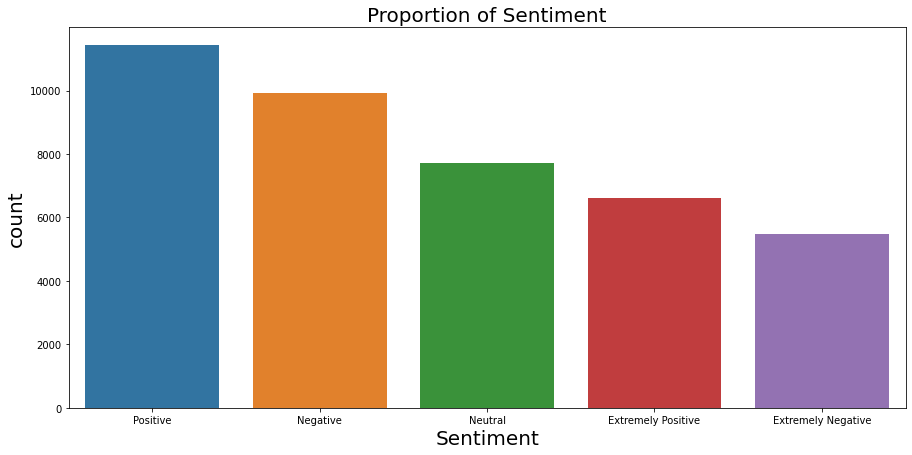

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

### **Observation** : 
**Number of "Positive" sentiments are higher than all other sentiments**

In [ ]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [ ]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


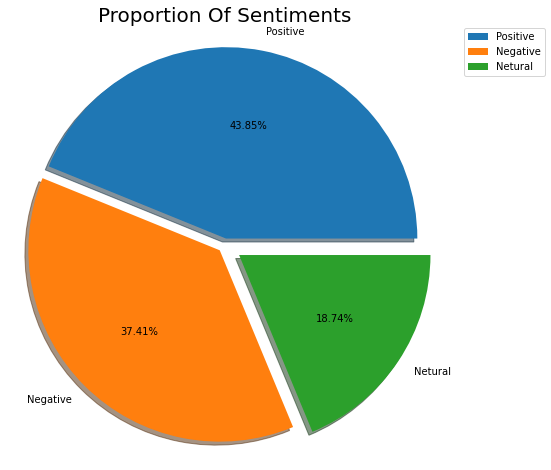

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

### **Obeservation** : 
**We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively.** 
**As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining.** 

In [ ]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [ ]:
from collections import Counter 
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,"'covid',",18286
1,"'coronavirus',",12991
2,"'prices',",7406
3,"'store',",6626
4,"'food',",6612
5,"'supermarket',",6410
6,"'grocery',",5790
7,"'people',",5067
8,"'amp',",4912
9,"'consumer',",4085


### **Obeservation** : 
**Word such as 'Covid' and 'Coronavirus' are having large number of frequency  present in our dataset.**

# **Word cloud**

In [ ]:
#seperating the sentiments for word cloud 
neutral = pd.DataFrame(df[['stemmed','lemmed']] [df['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Positive'])
negative = pd.DataFrame(df[['stemmed','lemmed']]  [df['Sentiment'] == 'Negative'])

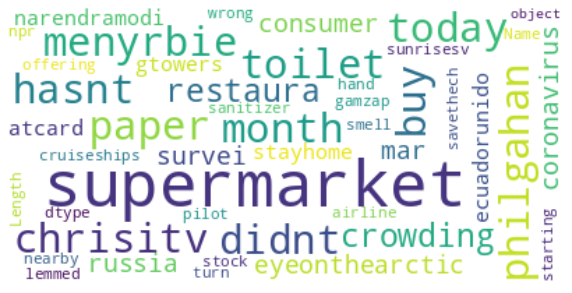

In [ ]:
wc = WordCloud(background_color='white',contour_width=1,contour_color='steelblue')
wc.generate(str(neutral['lemmed']))
plt.figure(figsize=(10,10))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

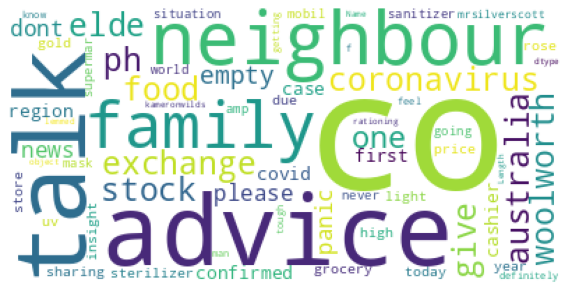

In [ ]:
# Generating word cloud for positive sentiments
wc.generate(str(positive['lemmed']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

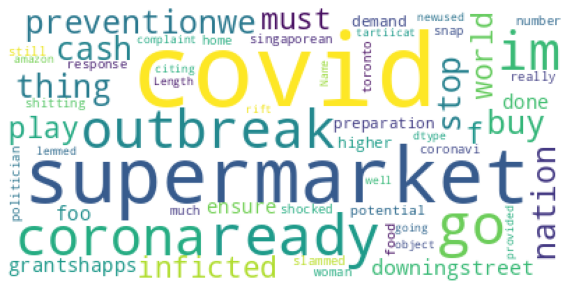

In [ ]:
# Generating word cloud for negative sentiments
wc.generate(str(negative['lemmed']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

# **Train-Test Split**

In [ ]:
#Assigning dependent and independent features
X= df['lemmed']
y=df['Sentiment']

In [ ]:
# Applying Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=10)

In [ ]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [ ]:
#checking splitted data
print(X_train.head())
y_train.head()

23805    [target, pull, back, store, remodels, opening,...
31828    [breaking, msf, call, patent, profiteering, dr...
24504    [coronavirus, spread, world, leader, get, toug...
17281    [store, shelf, empty, people, selling, certain...
11488    [fresco, u, normal, night, final, reduction, n...
Name: lemmed, dtype: object


23805     Neutral
31828    Negative
24504    Negative
17281    Positive
11488     Neutral
Name: Sentiment, dtype: object

# **Count Vectorization (Bag of words) and TF/IDF Vecorization**

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
# Bag of words
cv=CountVectorizer(binary=False,max_df=1.0,min_df=5,ngram_range=(1,2))
cv_X_train=cv.fit_transform(X_train.astype(str).str.strip())


In [ ]:
# TF-IDF
tv=TfidfVectorizer(use_idf=True,max_df=1.0,min_df=5,ngram_range=(1,2),sublinear_tf=True)
tv_X_train=tv.fit_transform(X_train.astype(str).str.strip())

In [ ]:
tv_X_train.shape

(28809, 17189)

In [ ]:
cv_X_test=cv.transform(X_test.astype(str).str.strip())
tv_X_test=tv.transform(X_test.astype(str).str.strip())

# **Implementing Models** (Bag of Words) by **Count Vectoriser**

## **1. Logistic Regression Count Vectoriser Method with Gridsearch CV**

In [ ]:
#Initalizing the model
lr_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(lr_cv,parameters,cv=15)

#fitting the data to model
logreg_Gcv.fit(cv_X_train,y_train)

GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_cv = logreg_Gcv.predict(cv_X_test)

In [ ]:
pred_lr_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [ ]:
#Accuracy
accuracy_lr_cv = accuracy_score(y_test,pred_lr_cv)
print("Accuracy :",(accuracy_lr_cv))

Accuracy : 0.7828798185941043


In [ ]:
# Classification report of Performance metrics
label=['neutral','positive','negative']
print(classification_report(y_test,pred_lr_cv))

              precision    recall  f1-score   support

    Negative       0.79      0.79      0.79      4620
     Neutral       0.68      0.68      0.68      2314
    Positive       0.82      0.83      0.82      5414

    accuracy                           0.78     12348
   macro avg       0.76      0.76      0.76     12348
weighted avg       0.78      0.78      0.78     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

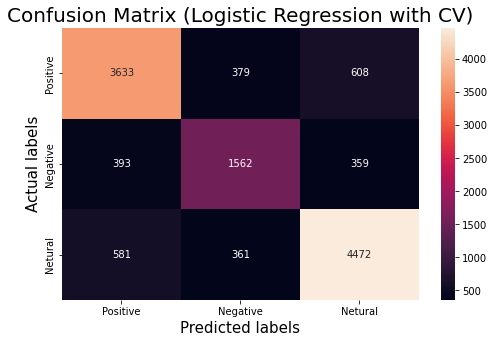

In [ ]:
#Plotting Confussion matrix
cf1= (confusion_matrix(y_test,pred_lr_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regression with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**This model gives an accuracy score of 78.28% which implies that our model is performing well.**

# **2. Decision Tree Classifier with CV**

In [ ]:
# Initializing model
dt_cv=DecisionTreeClassifier()

#fitting the data to model
dt_cv.fit(cv_X_train,y_train)

#predicted values
pred_dt_cv=dt_cv.predict(cv_X_test)

In [ ]:
pred_dt_cv

array(['Positive', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
cv_score_dt_cv= cross_val_score(dt_cv,cv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_cv)))

Accuracy: 0.689992812747459


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_cv))

              precision    recall  f1-score   support

    Negative       0.70      0.68      0.69      4620
     Neutral       0.62      0.67      0.64      2314
    Positive       0.75      0.74      0.75      5414

    accuracy                           0.70     12348
   macro avg       0.69      0.70      0.69     12348
weighted avg       0.71      0.70      0.71     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

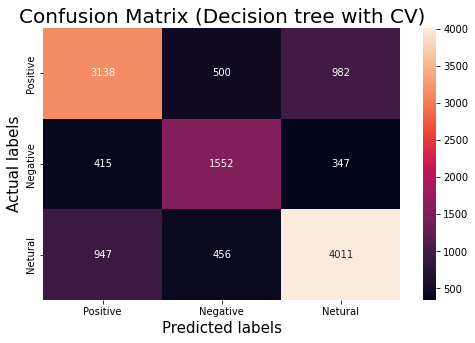

In [ ]:
#Plotting Confussion matrix
cf2= (confusion_matrix(y_test,pred_dt_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision tree with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**This model gives an accuracy score of 69.04% which implies that our model is performing well.**

# **3. K-NN Count Vectorizer with GridsearchCV**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_cv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_cv.fit(cv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
#predicted values
pred_knn_cv = knn_cv.predict(cv_X_test)


In [ ]:
pred_knn_cv

array(['Positive', 'Neutral', 'Neutral', ..., 'Negative', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
# Accuracy
accuracy_KNN = accuracy_score(y_test,pred_knn_cv)
print("Accuracy :",(accuracy_KNN))

Accuracy : 0.4103498542274053


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_cv))

              precision    recall  f1-score   support

    Negative       0.55      0.40      0.46      4620
     Neutral       0.25      0.72      0.37      2314
    Positive       0.69      0.29      0.41      5414

    accuracy                           0.41     12348
   macro avg       0.50      0.47      0.41     12348
weighted avg       0.55      0.41      0.42     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

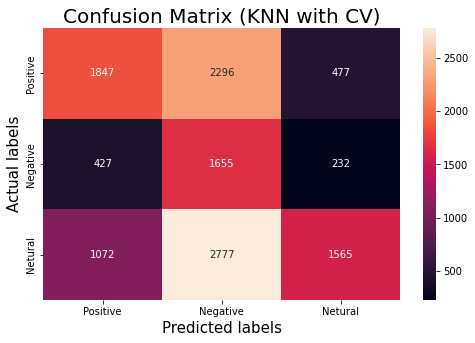

In [ ]:
#Plotting Confussion matrix
cf3= (confusion_matrix(y_test,pred_knn_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**The model is giving an accuracy score of 41% which implies that our model is underperforming.**

# 4. **SVM** with **CV**

In [ ]:
# Initializing model
svm_cv = SVC()

#fitting the data to model
svm_cv.fit(cv_X_train,y_train)

#prediction
pred_svm_cv = svm_cv.predict(cv_X_test)

In [ ]:
pred_svm_cv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Neutral',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
accuracy_svc = accuracy_score(y_test,pred_svm_cv)
print("Accuracy :",(accuracy_svc))

Accuracy : 0.7607709750566893


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_cv))

              precision    recall  f1-score   support

    Negative       0.77      0.75      0.76      4620
     Neutral       0.65      0.66      0.66      2314
    Positive       0.80      0.81      0.80      5414

    accuracy                           0.76     12348
   macro avg       0.74      0.74      0.74     12348
weighted avg       0.76      0.76      0.76     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

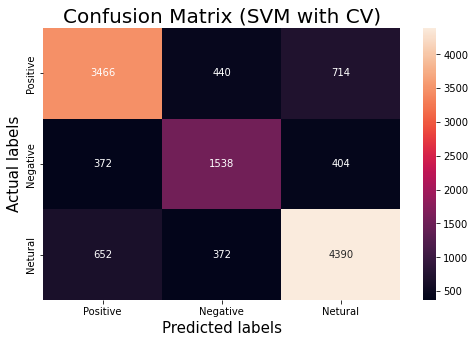

In [ ]:
#Plotting Confussion matrix
cf4= (confusion_matrix(y_test,pred_svm_cv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (SVM with CV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**This model gives an accuracy score of 76% which implies that our model is performing well.**

# **Implementing Models** by **TF/IDF Vectorizer**

## **1A**. **Logistic Regression TF/IDF vectorizer** with **GridsearchCV**

In [ ]:
# Initializing model
lr_tv=LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

#Hyperparameter tuning by GridserchCV
lr_tv_Gcv=GridSearchCV(lr_tv,parameters,cv=5)

#fitting the data to model
lr_tv_Gcv.fit(tv_X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
#predicted values
pred_lr_tv_Gcv = lr_tv_Gcv.predict(tv_X_test)

In [ ]:
pred_lr_tv_Gcv

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [ ]:
#Accuracy
accuracy_lr_Gcv = accuracy_score(y_test,pred_lr_tv_Gcv)
print("Accuracy :",(accuracy_lr_Gcv))

Accuracy : 0.7738095238095238


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_lr_tv_Gcv))

              precision    recall  f1-score   support

    Negative       0.78      0.78      0.78      4620
     Neutral       0.67      0.62      0.64      2314
    Positive       0.81      0.83      0.82      5414

    accuracy                           0.77     12348
   macro avg       0.75      0.74      0.75     12348
weighted avg       0.77      0.77      0.77     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

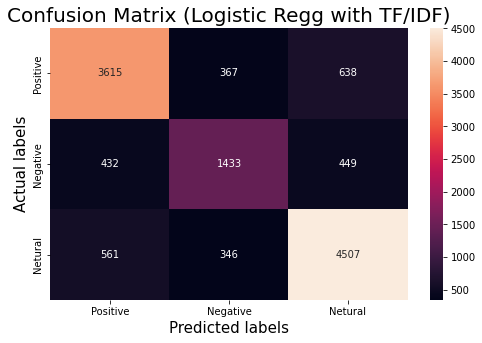

In [ ]:
#Plotting Confusion matrix
cf1a= (confusion_matrix(y_test,pred_lr_tv_Gcv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**This model gives an accuracy score of 77% which implies that our model is performing well.**

# **2A. Decision tree classifier** with **TF/IDF**

In [ ]:
# Initializing model
dt_tv=DecisionTreeClassifier()

#fitting the data to model
dt_tv.fit(tv_X_train,y_train)

#prediction
pred_dt_tv=dt_tv.predict(tv_X_test)

In [ ]:
pred_dt_tv

array(['Positive', 'Positive', 'Neutral', ..., 'Neutral', 'Positive',
       'Negative'], dtype=object)

In [ ]:
# Accuracy
cv_score_dt_tv= cross_val_score(dt_tv,tv_X_train,y_train, cv=5)
print("Accuracy: {}" .format(np.mean(cv_score_dt_tv)))

Accuracy: 0.6029365370239906


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_dt_tv))

              precision    recall  f1-score   support

    Negative       0.63      0.61      0.62      4620
     Neutral       0.48      0.55      0.52      2314
    Positive       0.69      0.67      0.68      5414

    accuracy                           0.62     12348
   macro avg       0.60      0.61      0.60     12348
weighted avg       0.63      0.62      0.63     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

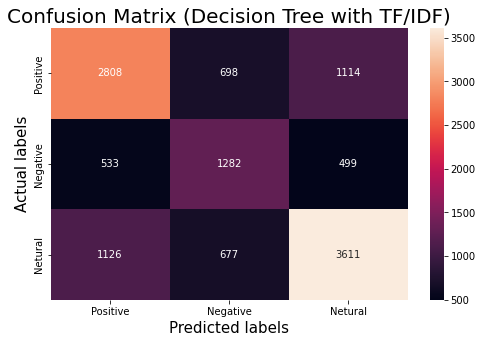

In [ ]:
#Plotting Confusion matrix
cf2a= (confusion_matrix(y_test,pred_dt_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf2a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Decision Tree with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**This model gives an accuracy score of 60% which implies that our model is performing well.**

# **3A. KNN** **TF/ID** with  **GridsearchCV**

In [ ]:
# Initializing model
knn = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}
knn_tv = GridSearchCV(estimator=knn,param_grid=param)

#fitting the data to model
knn_tv.fit(tv_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
#predicted values
pred_knn_tv = knn_cv.predict(tv_X_test)


In [ ]:
pred_knn_tv

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

In [ ]:
# Accuracy
accuracy_KNN_tv = accuracy_score(y_test,pred_knn_tv)
print("Accuracy :",(accuracy_KNN_tv))

Accuracy : 0.3753644314868805


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_knn_tv))

              precision    recall  f1-score   support

    Negative       0.37      1.00      0.55      4620
     Neutral       0.93      0.01      0.01      2314
    Positive       0.33      0.00      0.00      5414

    accuracy                           0.38     12348
   macro avg       0.55      0.34      0.19     12348
weighted avg       0.46      0.38      0.21     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

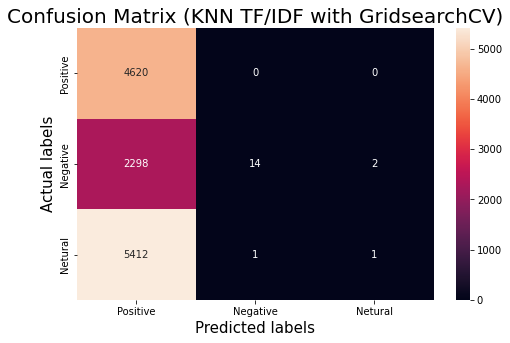

In [ ]:
#Plotting Confusion matrix
cf3a= (confusion_matrix(y_test,pred_knn_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf3a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**This model gives an accuracy score of 37% which implies that our model is underperforming.**

# **4A**. **SVM** with **TF/ID** 

In [ ]:
# Initializing model
svm_tv = SVC()

#fitting the data to model
svm_tv.fit(tv_X_train,y_train)

#prediction
pred_svm_tv = svm_tv.predict(tv_X_test)

In [ ]:
pred_svm_tv

array(['Positive', 'Positive', 'Negative', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

In [ ]:
# Accuracy
accuracy_svm_tv = accuracy_score(y_test,pred_svm_tv)
print("Accuracy :",(accuracy_svm_tv))

Accuracy : 0.7657920310981535


In [ ]:
# Classification report of Performance metrics
label=['Neutral','Positive','Negative']
print(classification_report(y_test,pred_svm_tv))

              precision    recall  f1-score   support

    Negative       0.76      0.80      0.78      4620
     Neutral       0.73      0.52      0.61      2314
    Positive       0.78      0.84      0.81      5414

    accuracy                           0.77     12348
   macro avg       0.76      0.72      0.73     12348
weighted avg       0.76      0.77      0.76     12348



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Netural')]

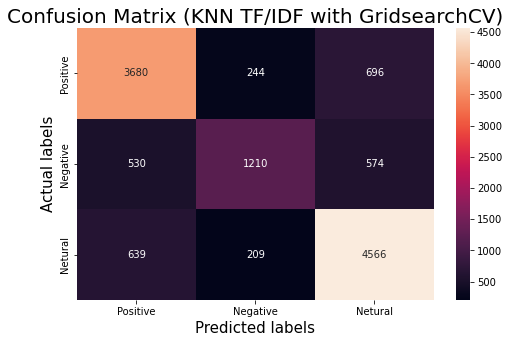

In [ ]:
#Plotting Confusion matrix
cf4a= (confusion_matrix(y_test,pred_svm_tv))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf4a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (KNN TF/IDF with GridsearchCV)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Observation** : 
**This model gives an accuracy score of 76% which implies that our model is performing well.**

In [ ]:
# Model's acurracy Score Comparision

acurracy = {'Model':  ['Logistic Regression with GridserachCV', 'Decision Tree Classifier','K-Nearest-Neighbours Classifier','Support-Vector-Machine Classifier'],
        'Count Vector':  [accuracy_lr_cv,np.mean(cv_score_dt_cv),accuracy_KNN,accuracy_svc],
        'Tf-idf Vector': [accuracy_lr_Gcv,np.mean(cv_score_dt_tv),accuracy_KNN_tv,accuracy_svm_tv]}

cv_score_table= pd.DataFrame (acurracy, columns = ['Model','Count Vector','Tf/idf Vector'])

cv_score_table

# **Conclusions:**

### 1. We applied 4 different machine learing models namely, Logistic Regression with Grid Search CV, Desision Tree Classifier, KNN, SVM Classifier for both Count Vector And TF IDF Vectorisation techniques.

### 2. We conclude that the machine is generating best results for Logistic Regression with Grid Search CV model with Accuracy scores of 78.28% and 77.43% respectively for Count vector and TF/idf Vector, followed by SVM

### 3. Also, we observed that no overfitting is seen for the data, and we can deploy this model.

### 4. The sentiments of future tweets can be easily predicted using this model.
